# Prototype Model
這個模型使用簡單的價量資料，預測單一個股漲跌，作為後續模型的原型

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from module import *

pd.options.mode.chained_assignment = None  # default='warn'

## Load Price Data

In [2]:
price = load_price_data()
price.head(3)

/Users/stuartlu/Documents/國泰人壽/ML 選股/module.py:18: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  price = pd.read_csv(path, encoding='cp950')


Open     High      Low    Close  Volume  QuoteVolume   
證券代碼    年月日                                                                   
1101 台泥 2015-01-05  20.3688  20.3688  20.0872  20.1810    2842       122244  \
        2015-01-06  19.9464  19.9933  19.7586  19.8290    7654       324150   
        2015-01-07  19.8290  19.9698  19.6413  19.7586    8719       368171   

                    YSTD Close  TMR Close  Daily Return  
證券代碼    年月日                                              
1101 台泥 2015-01-05         NaN    19.8290     -0.017596  
        2015-01-06      20.181    19.7586     -0.003557  
        2015-01-07      19.829    19.8290      0.003557

## Load Feature Data

In [3]:
data = load_fundamental_data('./data/ifrs.csv')
data.head(3)

年月  季別  月份   現金及約當現金  透過損益按公允價值衡量之金融資產－流動   
證券代碼    財報發布日                                                        
1101 台泥 2015-05-15  2015-03   1   3  31406216               146388  \
        2015-08-14  2015-06   2   6  35848634               145919   
        2015-11-13  2015-09   3   9  35931378               148581   

                    透過其他綜合損益按公允價值衡量之金融資產－流動  按攤銷後成本衡量之金融資產－流動  避險之金融資產－流動   
證券代碼    財報發布日                                                               
1101 台泥 2015-05-15               19582139.0                 0         0.0  \
        2015-08-14               18260651.0                 0         0.0   
        2015-11-13               16358225.0                 0         0.0   

                    合約資產－流動     應收帳款及票據  ...  當季季底P/E  當季季底P/B  當季季底PSR   
證券代碼    財報發布日                            ...                              
1101 台泥 2015-05-15      0.0  21758400.0  ...     8.53     1.38     1.44  \
        2015-08-14      0.0  21357337.0  ...     8.96     1.31     1.35   
        2015-11-13      0.0  19703043.0  ...    11.07     1.12     1.25   

                    財報類別（1個別2個體3合併）   財報年月起日   財報年月迄日  交易所主產業代碼  交易所子產業代碼   
證券代碼    財報發布日                                                               
1101 台泥 2015-05-15                3  2015/01  2015/03     M1100     M1100  \
        2015-08-14                3  2015/01  2015/06     M1100     M1100   
        2015-11-13                3  2015/01  2015/09     M1100     M1100   

                    TEJ主產業代碼  TEJ子產業代碼  
證券代碼    財報發布日                           
1101 台泥 2015-05-15       11A       11A  
        2015-08-14       11A       11A  
        2015-11-13       11A       11A  

[3 rows x 245 columns]

In [4]:
fundamental_features = ['年月', 'ROA', 'EBITDA', 'ROE', 'Gross Profit', 'Revenue Growth', 'Net Operating Revenue', 'P/E Ratio', 'P/B Ratio', 'PSR']

def select_features(data, features = ['年月', 'ROA－綜合損益','稅前息前折舊前淨利率', 'ROE－綜合損益', '營業毛利率', '營收成長率', '營業收入淨額', '當季季底P/E', '當季季底P/B', '當季季底PSR'], rename = fundamental_features):
    data = data.rename(columns = dict(zip(features, rename)))
    return data[rename]

selected_features = select_features(data)
selected_features

年月   ROA  EBITDA   ROE  Gross Profit   
證券代碼     財報發布日                                                   
1101 台泥  2015-05-15  2015-03  0.07   17.52  0.12         13.34  \
         2015-08-14  2015-06  0.20   21.77  0.38         15.67   
         2015-11-13  2015-09  0.23   15.82  0.45         14.57   
         2016-03-31  2015-12 -0.71   21.06 -1.33         18.09   
         2016-05-13  2016-03 -0.26   14.74 -0.47          8.95   
...                      ...   ...     ...   ...           ...   
9958 世紀鋼 2023-05-15  2023-03 -0.03   10.15 -0.09          6.17   
         2023-08-11  2023-06  0.66   18.25  2.13         13.36   
         2023-11-13  2023-09  1.29   24.85  4.05         18.36   
         2024-03-08  2023-12  2.10   26.35  5.90         24.20   
         2024-05-14  2024-03  3.56   46.44  8.33         37.76   

                     Revenue Growth  Net Operating Revenue  P/E Ratio   
證券代碼     財報發布日                                                          
1101 台泥  2015-05-15          -19.75               21440142       8.53  \
         2015-08-14          -21.58               24994185       8.96   
         2015-11-13          -24.63               22683975      11.07   
         2016-03-31          -17.14               24560774      11.80   
         2016-05-13          -17.33               17724112      15.82   
...                             ...                    ...        ...   
9958 世紀鋼 2023-05-15           20.31                2675284    -888.00   
         2023-08-11           84.90                3218818    -888.00   
         2023-11-13           57.61                3645290     156.81   
         2024-03-08           68.99                4976206      25.39   
         2024-05-14           17.71                3148958      20.65   

                     P/B Ratio   PSR  
證券代碼     財報發布日                        
1101 台泥  2015-05-15       1.38  1.44  
         2015-08-14       1.31  1.35  
         2015-11-13       1.12  1.25  
         2016-03-31       0.93  1.08  
         2016-05-13       1.08  1.29  
...                        ...   ...  
9958 世紀鋼 2023-05-15       3.17   NaN  
         2023-08-11       4.35   NaN  
         2023-11-13       5.41   NaN  
         2024-03-08       4.69   NaN  
         2024-05-14       4.77   NaN  

[35552 rows x 10 columns]

## Remove Outliers

In [ ]:
def is_valid(feature, n):
    ub = feature.mean() + n * feature.std()
    lb = feature.mean() - n * feature.std()
    return (feature > lb) & (feature < ub)

ROA_valid = is_valid(features['ROA'], 8)
features['ROA'][ROA_valid].hist(bins=100)
num_outliers = features.shape[0] - len(features['ROA'][ROA_valid])
print(f'Number of outliers for ROA: {num_outliers}')

EBITDA_valid = is_valid(features['EBITDA'],0.005)
features['EBITDA'][EBITDA_valid].hist(bins=100)
num_outliers = features.shape[0] - len(features['EBITDA'][EBITDA_valid])
print(f'Number of outliers for EBITDA: {num_outliers}')

In [5]:
def merge_feature_data(feature: pd.DataFrame, price, return_mode = 'simple'):
    '''
    This function merge data with different frequency and return seasonal data 
    that contain entry and exit for each period.
    '''

    #merge data and convert frequency to seasonal
    data_merged = feature.merge(price, how='outer', left_index=True, right_index=True)
    seasonal = (data_merged.index.get_level_values('財報發布日') == data_merged.index.get_level_values('年月日'))
    data_seasonal = data_merged[seasonal]

    #calculate returns
    data_seasonal['YSTD Close Shift'] = data_seasonal.groupby('證券代碼')['YSTD Close'].shift(-1)
    
    if return_mode == 'simple':
        data_seasonal['Seasonal Return'] = (data_seasonal['YSTD Close Shift'] / data_seasonal['TMR Close']) - 1
    else:
        data_seasonal['Seasonal Return'] = (data_seasonal['YSTD Close Shift'] / data_seasonal['TMR Close']).apply(np.log)

    data_seasonal.set_index('年月', append=True, inplace=True)
    data_seasonal.sort_index(level=3, inplace = True)

    return data_seasonal

data_seasonal = merge_feature_data(selected_features, price, return_mode='simple')
data_seasonal

ROA  EBITDA   ROE  Gross Profit   
證券代碼      財報發布日      年月日        年月                                          
1101 台泥   2015-05-15 2015-05-15 2015-03  0.07   17.52  0.12         13.34  \
1102 亞泥   2015-05-15 2015-05-15 2015-03  1.92   24.17  3.33         10.63   
1103 嘉泥   2015-05-13 2015-05-13 2015-03 -1.91  -10.98 -3.34        -11.27   
1104 環泥   2015-05-14 2015-05-14 2015-03  1.57   23.09  1.93          8.30   
1108 幸福   2015-05-14 2015-05-14 2015-03  1.89   23.41  3.34         20.98   
...                                       ...     ...   ...           ...   
9945 潤泰新  2024-05-13 2024-05-13 2024-03  5.51  142.72  9.41         25.53   
9946 三發地產 2024-05-10 2024-05-10 2024-03  1.02   16.02  2.40         29.02   
9955 佳龍   2024-05-08 2024-05-08 2024-03 -1.04   -2.54 -2.28         -0.81   
9958 世紀鋼  2024-05-14 2024-05-14 2024-03  3.56   46.44  8.33         37.76   
1773 勝一   2024-07-16 2024-07-16 2024-06   NaN     NaN   NaN           NaN   

                                         Revenue Growth   
證券代碼      財報發布日      年月日        年月                        
1101 台泥   2015-05-15 2015-05-15 2015-03          -19.75  \
1102 亞泥   2015-05-15 2015-05-15 2015-03           -5.50   
1103 嘉泥   2015-05-13 2015-05-13 2015-03          -34.14   
1104 環泥   2015-05-14 2015-05-14 2015-03           -3.75   
1108 幸福   2015-05-14 2015-05-14 2015-03            5.54   
...                                                 ...   
9945 潤泰新  2024-05-13 2024-05-13 2024-03           11.16   
9946 三發地產 2024-05-10 2024-05-10 2024-03           90.84   
9955 佳龍   2024-05-08 2024-05-08 2024-03            3.92   
9958 世紀鋼  2024-05-14 2024-05-14 2024-03           17.71   
1773 勝一   2024-07-16 2024-07-16 2024-06             NaN   

                                         Net Operating Revenue  P/E Ratio   
證券代碼      財報發布日      年月日        年月                                          
1101 台泥   2015-05-15 2015-05-15 2015-03             21440142.0       8.53  \
1102 亞泥   2015-05-15 2015-05-15 2015-03             15362530.0      11.69   
1103 嘉泥   2015-05-13 2015-05-13 2015-03               671355.0     164.13   
1104 環泥   2015-05-14 2015-05-14 2015-03              1327430.0      12.26   
1108 幸福   2015-05-14 2015-05-14 2015-03              1286874.0       8.25   
...                                                        ...        ...   
9945 潤泰新  2024-05-13 2024-05-13 2024-03              7000524.0       7.02   
9946 三發地產 2024-05-10 2024-05-10 2024-03               301274.0      62.91   
9955 佳龍   2024-05-08 2024-05-08 2024-03               272888.0    -888.00   
9958 世紀鋼  2024-05-14 2024-05-14 2024-03              3148958.0      20.65   
1773 勝一   2024-07-16 2024-07-16 2024-06              2636817.0        NaN   

                                         P/B Ratio   PSR      Open      High   
證券代碼      財報發布日      年月日        年月                                             
1101 台泥   2015-05-15 2015-05-15 2015-03       1.38  1.44   20.0402   20.1576  \
1102 亞泥   2015-05-15 2015-05-15 2015-03       0.90  1.73   22.3520   22.3811   
1103 嘉泥   2015-05-13 2015-05-13 2015-03       0.64  2.99    9.6688    9.6688   
1104 環泥   2015-05-14 2015-05-14 2015-03       1.14  3.15   16.6657   16.6657   
1108 幸福   2015-05-14 2015-05-14 2015-03       0.94  0.87    7.1766    7.3475   
...                                            ...   ...       ...       ...   
9945 潤泰新  2024-05-13 2024-05-13 2024-03       0.97   NaN   39.6262   42.5292   
9946 三發地產 2024-05-10 2024-05-10 2024-03       1.24   NaN   37.0000   38.2000   
9955 佳龍   2024-05-08 2024-05-08 2024-03       1.99   NaN   30.5500   30.7000   
9958 世紀鋼  2024-05-14 2024-05-14 2024-03       4.77   NaN  239.5000  253.5000   
1773 勝一   2024-07-16 2024-07-16 2024-06        NaN   NaN  154.0000  155.0000   

                                              Low     Close  Volume   
證券代碼      財報發布日      年月日        年月                                    
1101 台泥   2015-05-15 2015-05-15 2015-03   19.8760   19.9464    4962  \
1102 亞泥   2015-0

## Scaling and Imputing Data

In [44]:
from sklearn.preprocessing import *
from sklearn.impute import SimpleImputer

def scale_data(data):
    
    returns_preserved = data['Seasonal Return'] #preseve return from any modification
    data_scaled = pd.DataFrame(scale(data), index = data.index, columns = data.columns) #scaling data
    data_scaled['Seasonal Return'] = returns_preserved #append back preserved return
    
    return data_scaled

def impute_data(data):
    
    returns_preserved = data['Seasonal Return'] #preseve return from any modification
    #imp = SimpleImputer(strategy='mean') #imputing data
    #imp.fit(data)
    #data_imputed = pd.DataFrame(imp.transform(data), index = data.index, columns = data.columns)
    data_imputed = data.groupby('證券代碼').fillna(method='ffill').fillna(0)
    data_imputed['Seasonal Return'] = returns_preserved #append back preserved return
    data_imputed.fillna(0, inplace=True)

    return data_imputed


data_scaled = scale_data(data_seasonal)
data_imputed = impute_data(data_scaled)
data_imputed

ROA    EBITDA       ROE   
證券代碼      財報發布日      年月日        年月                                      
1101 台泥   2015-05-15 2015-05-15 2015-03 -0.294548  0.025785 -0.124971  \
1102 亞泥   2015-05-15 2015-05-15 2015-03  0.287105  0.027365  0.137753   
1103 嘉泥   2015-05-13 2015-05-13 2015-03 -0.917074  0.019013 -0.408155   
1104 環泥   2015-05-14 2015-05-14 2015-03  0.177063  0.027109  0.023169   
1108 幸福   2015-05-14 2015-05-14 2015-03  0.277673  0.027185  0.138571   
...                                           ...       ...       ...   
9945 潤泰新  2024-05-13 2024-05-13 2024-03  1.415826  0.055533  0.635372   
9946 三發地產 2024-05-10 2024-05-10 2024-03  0.004139  0.025429  0.061637   
9955 佳龍   2024-05-08 2024-05-08 2024-03 -0.643540  0.021019 -0.321399   
9958 世紀鋼  2024-05-14 2024-05-14 2024-03  0.802732  0.032657  0.546979   
1773 勝一   2024-07-16 2024-07-16 2024-06  0.588936  0.027738  0.248244   

                                         Gross Profit  Revenue Growth   
證券代碼      財報發布日      年月日        年月                                      
1101 台泥   2015-05-15 2015-05-15 2015-03     -0.204496       -0.020126  \
1102 亞泥   2015-05-15 2015-05-15 2015-03     -0.266273       -0.019715   
1103 嘉泥   2015-05-13 2015-05-13 2015-03     -0.765507       -0.020541   
1104 環泥   2015-05-14 2015-05-14 2015-03     -0.319388       -0.019665   
1108 幸福   2015-05-14 2015-05-14 2015-03     -0.030334       -0.019397   
...                                               ...             ...   
9945 潤泰新  2024-05-13 2024-05-13 2024-03      0.073389       -0.019235   
9946 三發地產 2024-05-10 2024-05-10 2024-03      0.152947       -0.016939   
9955 佳龍   2024-05-08 2024-05-08 2024-03     -0.527060       -0.019444   
9958 世紀鋼  2024-05-14 2024-05-14 2024-03      0.352185       -0.019046   
1773 勝一   2024-07-16 2024-07-16 2024-06      0.249830       -0.019314   

                                         Net Operating Revenue  P/E Ratio   
證券代碼      財報發布日      年月日        年月                                          
1101 台泥   2015-05-15 2015-05-15 2015-03               0.233164  -0.005899  \
1102 亞泥   2015-05-15 2015-05-15 2015-03               0.118184  -0.005690   
1103 嘉泥   2015-05-13 2015-05-13 2015-03              -0.159752   0.004362   
1104 環泥   2015-05-14 2015-05-14 2015-03              -0.147340  -0.005653   
1108 幸福   2015-05-14 2015-05-14 2015-03              -0.148107  -0.005917   
...                                                        ...        ...   
9945 潤泰新  2024-05-13 2024-05-13 2024-03              -0.040013  -0.005998   
9946 三發地產 2024-05-10 2024-05-10 2024-03              -0.166754  -0.002313   
9955 佳龍   2024-05-08 2024-05-08 2024-03              -0.167291  -0.065016   
9958 世紀鋼  2024-05-14 2024-05-14 2024-03              -0.112879  -0.005099   
1773 勝一   2024-07-16 2024-07-16 2024-06              -0.122568  -0.004907   

                                         P/B Ratio       PSR      Open   
證券代碼      財報發布日      年月日        年月                                       
1101 台泥   2015-05-15 2015-05-15 2015-03  -0.170762 -0.020352 -0.235656  \
1102 亞泥   2015-05-15 2015-05-15 2015-03  -0.331009 -0.020091 -0.218768   
1103 嘉泥   2015-05-13 2015-05-13 2015-03  -0.417809 -0.018957 -0.311421   
1104 環泥   2015-05-14 2015-05-14 2015-03  -0.250886 -0.018813 -0.260308   
1108 幸福   2015-05-14 2015-05-14 2015-03  -0.317655 -0.020865 -0.329627   
...                                            ...       ...       ...   
9945 潤泰新  2024-05-13 2024-05-13 2024-03  -0.307640 -0.018417 -0.092577   
9946 三發地產 2024-05-10 2024-05-10 2024-03  -0.217501 -0.020073 -0.111762   
9955 佳龍   2024-05-08 2024-05-08 2024-03   0.032884 -0.019866 -0.158880   
9958 世紀鋼  2024-05-14 2024-05-14 2024-03   0.960979 -0.019641  1.367540   
1773 勝一   2024-07-16 2024-07-16 2024-06   1.064472 -0.019380  0.742946   

                                             High       Low     Close   
證券代碼      財報發布日      年月日        年月                                      
1101 台泥   2015-05-15 2015-05-15 201

In [45]:
def polynomial_transform(data):

    returns_preserved = data['Seasonal Return'] #preseve return from any modification
    data.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume', 'QuoteVolume',	'YSTD Close', 'TMR Close', 'Daily Return', 'YSTD Close Shift', 'Seasonal Return'], inplace=True)
    poly = PolynomialFeatures(interaction_only=True)
    poly.fit(data)
    data_transformed = pd.DataFrame(poly.transform(data), index = data.index, columns = poly.get_feature_names_out(data.columns))
    data_transformed['Seasonal Return'] = returns_preserved #append back preserved return

    return data_transformed


data_imputed = polynomial_transform(data_imputed)

## Labeling

In [46]:
#compute period mean
data_imputed['Cross Section Median'] = data_imputed.groupby('年月')['Seasonal Return'].transform('median')
print(data_imputed['Cross Section Median'])

證券代碼       財報發布日       年月日         年月     
1101 台泥    2015-05-15  2015-05-15  2015-03   -0.14555
1102 亞泥    2015-05-15  2015-05-15  2015-03   -0.14555
1103 嘉泥    2015-05-13  2015-05-13  2015-03   -0.14555
1104 環泥    2015-05-14  2015-05-14  2015-03   -0.14555
1108 幸福    2015-05-14  2015-05-14  2015-03   -0.14555
                                               ...   
9945 潤泰新   2024-05-13  2024-05-13  2024-03    0.00000
9946 三發地產  2024-05-10  2024-05-10  2024-03    0.00000
9955 佳龍    2024-05-08  2024-05-08  2024-03    0.00000
9958 世紀鋼   2024-05-14  2024-05-14  2024-03    0.00000
1773 勝一    2024-07-16  2024-07-16  2024-06    0.00000
Name: Cross Section Median, Length: 33707, dtype: float64


In [53]:
from sklearn.model_selection import train_test_split


data_train, data_test = train_test_split(data_imputed, test_size = 0.5, random_state=0, shuffle=False)

from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.svm import SVC

features_used = ['ROA', 'EBITDA', 'ROE', 'Gross Profit', 'Revenue Growth', 'Net Operating Revenue', 'P/E Ratio', 'P/B Ratio', 'PSR']

#reg = LogisticRegression(max_iter = 2000)
reg = Ridge()
reg.fit(data_train.drop(columns = ['Seasonal Return', 'Cross Section Median']), data_train['Seasonal Return'] - data_train['Cross Section Median'])

Ridge()

In [54]:
score_insample = reg.score(data_train.drop(columns = ['Seasonal Return', 'Cross Section Median']), data_train['Seasonal Return'] - data_train['Cross Section Median'])
score_outsample = reg.score(data_test.drop(columns = ['Seasonal Return', 'Cross Section Median']), data_test['Seasonal Return'] - data_test['Cross Section Median'])

print(f'In sample score: {score_insample}')
print(f'Out sample score: {score_outsample}')

In sample score: 0.007247537643015556
Out sample score: -0.4610662927540934


## Backtest

In [32]:
def return_summary(series):
    mean = series.mean()
    std = series.std()
    sharpe = mean / std
    annual_sharpe = sharpe * (252)**(0.5)
    annual_return_simple = mean*252
    annual_return_compounded = np.exp(mean*252)-1
    print(f'Annual Sharpe: {annual_sharpe}')
    print(f'Annual Return (Simple): {annual_return_simple}')
    print(f'Annual Return (Compounded): {annual_return_compounded}')

def backtest_daily():
    history = data_imputed.copy()
    history['Logistic Prediction'] = reg.predict(history.drop(columns = ['Seasonal Return', 'Cross Section Median']))
    history = history.reset_index()
    history.set_index(['證券代碼', '年月日'], inplace=True)
    history_merged = price[['Daily Return']].merge(history[['Logistic Prediction']], left_index=True, right_index=True, how='outer')
    history_merged = history_merged.groupby('證券代碼').fillna(method='ffill')

    history_merged.reset_index(inplace=True)
    dates = sorted(list(set(history_merged['年月日'])))

    seasonal_returns_long = []
    seasonal_returns_short = []
    for date in dates:
        print(date)
        current_stocks = history_merged[history_merged['年月日'] == date]
        buy_stock = current_stocks[current_stocks['Logistic Prediction'] == True]
        sell_stock = current_stocks[current_stocks['Logistic Prediction'] == False]

        print('Long stocks: ' + str(list(buy_stock['證券代碼'])))
        print('Short stocks: ' + str(list(sell_stock['證券代碼'])))
        print(f'Stock bought: {len(list(buy_stock["證券代碼"]))}, Stock shorted: {len(list(sell_stock["證券代碼"]))}, Total: {len(list(buy_stock["證券代碼"]))+len(list(sell_stock["證券代碼"]))}')
        long = buy_stock['Daily Return'].mean()
        short = -sell_stock['Daily Return'].mean()
        seasonal_returns_long.append(long)
        seasonal_returns_short.append(short)

    long_portfolio = pd.Series(seasonal_returns_long, index = dates)
    short_portfolio = pd.Series(seasonal_returns_short, index = dates)
    return long_portfolio, short_portfolio

def plot_portfolio(portfolio):
    portfolio['long-short (self-financing)'] = (portfolio[9] - portfolio[0])
    portfolio['long-short'] = (portfolio[9] - portfolio[0])/2

    import yfinance as yf
    benchmark = yf.download('^TWII', start = '2015-01-05', end = '2024-07-17')
    tw_0050 = yf.download('0050.TW', start = '2015-01-05', end = '2024-07-17')
    portfolio['benchmark'] = np.log(benchmark['Adj Close'] / benchmark['Adj Close'].shift(1))
    portfolio['0050'] = np.log(tw_0050['Adj Close'] / tw_0050['Adj Close'].shift(1))
    portfolio['synthesis'] = (portfolio['long-short'] + portfolio['0050'])/2

    ((portfolio[['benchmark', '0050', 'long-short', 'long-short (self-financing)', 0, 9, 'synthesis']]).cumsum() + 1).plot()

In [55]:
history = data_imputed.copy()
history['Probability'] = reg.predict(history.drop(columns = ['Seasonal Return', 'Cross Section Median']))
history = history.reset_index()
history.set_index(['證券代碼', '年月日'], inplace=True)
history_merged = price[['Daily Return']].merge(history[['Probability']], left_index=True, right_index=True, how='outer')
preserved_return = history_merged['Daily Return']
history_merged = history_merged.groupby('證券代碼').fillna(method='ffill')
history_merged['Daily Return'] = preserved_return.groupby('證券代碼').shift(-1) # shift return to ensure that there is no look ahead bias

history_merged.reset_index(inplace=True)
history_merged.fillna(0, inplace=True)
dates = sorted(list(set(history_merged['年月日'])))

seasonal_returns_long = []
seasonal_returns_short = []

decile1 = []
decile2 = []
decile3 = []
decile4 = []
decile5 = []
decile6 = []
decile7 = []
decile8 = []
decile9 = []
decile10 = []
'''
decile11 = []
decile12 = []
decile13 = []
decile14 = []
decile15 = []
decile16 = []
decile17 = []
decile18 = []
decile19 = []
decile20 = []
'''
deciles = [decile1, decile2, decile3, decile4, decile5, decile6, decile7, decile8, decile9, decile10]#,
#decile11, decile12, decile13, decile14, decile15, decile16, decile17, decile18, decile19, decile20]


for date in dates:
    print(date)
    current_stocks = history_merged[history_merged['年月日'] == date]
    current_stocks.sort_values(by='Probability', ascending=False, inplace=True)
    current_stocks['Decile'] = pd.qcut(current_stocks['Probability'], 10, labels=False, duplicates='drop') + 1

    for x, decile in enumerate(deciles):
        buy_stock = current_stocks[current_stocks['Decile'] == x + 1]

        if x == 9 or x == 0:

            print(f'Decile {x+1} buy stocks: ' + str(list(buy_stock['證券代碼'])))
            print(f'Stock bought: {len(list(buy_stock["證券代碼"]))}')
        mean = buy_stock['Daily Return'].mean()
        decile.append(mean)

2015-01-05 00:00:00
Decile 1 buy stocks: []
Stock bought: 0
Decile 10 buy stocks: []
Stock bought: 0
2015-01-06 00:00:00
Decile 1 buy stocks: []
Stock bought: 0
Decile 10 buy stocks: []
Stock bought: 0
2015-01-07 00:00:00
Decile 1 buy stocks: []
Stock bought: 0
Decile 10 buy stocks: []
Stock bought: 0
2015-01-08 00:00:00
Decile 1 buy stocks: []
Stock bought: 0
Decile 10 buy stocks: []
Stock bought: 0
2015-01-09 00:00:00
Decile 1 buy stocks: []
Stock bought: 0
Decile 10 buy stocks: []
Stock bought: 0
2015-01-12 00:00:00
Decile 1 buy stocks: []
Stock bought: 0
Decile 10 buy stocks: []
Stock bought: 0
2015-01-13 00:00:00
Decile 1 buy stocks: []
Stock bought: 0
Decile 10 buy stocks: []
Stock bought: 0
2015-01-14 00:00:00
Decile 1 buy stocks: []
Stock bought: 0
Decile 10 buy stocks: []
Stock bought: 0
2015-01-15 00:00:00
Decile 1 buy stocks: []
Stock bought: 0
Decile 10 buy stocks: []
Stock bought: 0
2015-01-16 00:00:00
Decile 1 buy stocks: []
Stock bought: 0
Decile 10 buy stocks: []
Stock 

<Axes: >

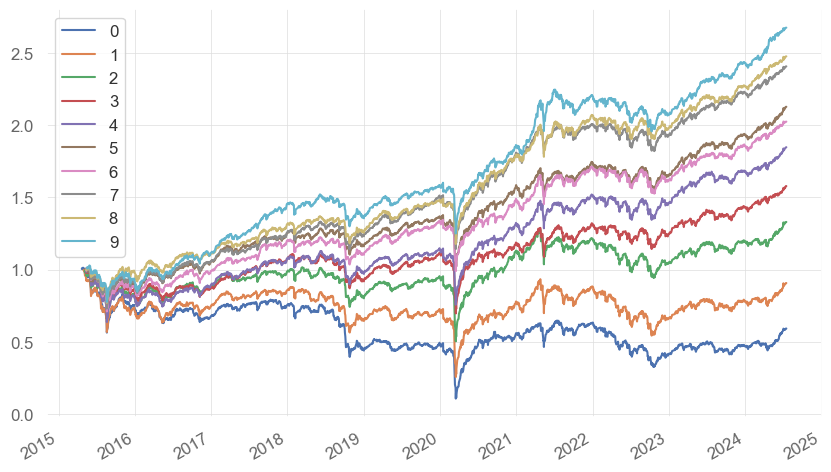

In [56]:
pd_deciles = []

for decile in deciles:
    pd_deciles.append(pd.Series(decile, index = dates))
    
portfolio = pd.concat(pd_deciles, axis=1)
((portfolio).cumsum() + 1).plot()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


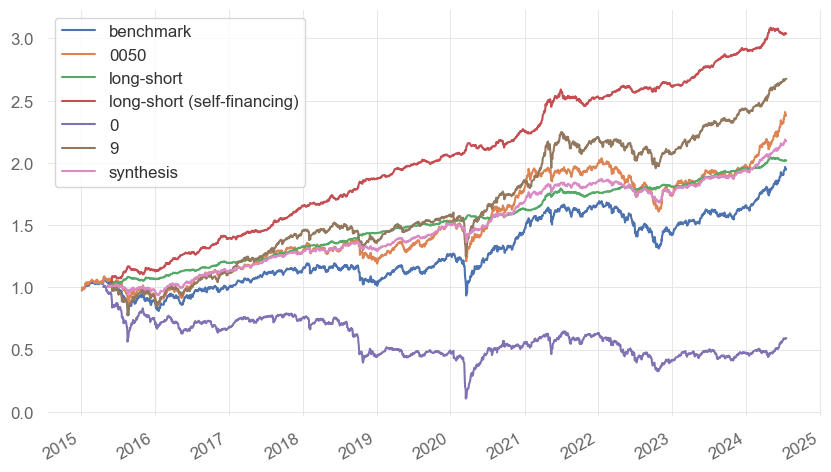

In [57]:
plot_portfolio(portfolio)

In [58]:
import quantstats as qs

qs.reports.metrics(portfolio, mode = 'Full')

                           0           1           2           3           4           5           6           7           8           9           long-short (self-financing)    long-short    benchmark    0050        synthesis
-------------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  -----------------------------  ------------  -----------  ----------  -----------
Start Period               2015-05-15  2015-05-15  2015-05-15  2015-05-15  2015-05-15  2015-05-15  2015-05-15  2015-05-15  2015-05-15  2015-05-15  2015-05-15                     2015-05-15    2015-05-15   2015-05-15  2015-05-15
End Period                 2024-07-16  2024-07-16  2024-07-16  2024-07-16  2024-07-16  2024-07-16  2024-07-16  2024-07-16  2024-07-16  2024-07-16  2024-07-16                     2024-07-16    2024-07-16   2024-07-16  2024-07-16
Risk-Free Rate             0.0%        0.0%        0.0%        0.0%        0.0%        0

In [84]:
qs.reports.html(portfolio[9], benchmark=portfolio['0050'], active_returns = True)

In [ ]:
#portfolio = pd.DataFrame()
#portfolio['long'], portfolio['short'] = backtest_daily_stocksort()
portfolio = backtest_daily_stocksort()
portfolio

In [ ]:
((portfolio + 1).cumprod()).plot()

In [ ]:
import quantstats as qs

qs.stats.sharpe(portfolio)
qs.plots.snapshot(portfolio[['long', 'short']])

In [ ]:
qs.reports.basic(portfolio[['long', 'short']])

In [ ]:
def backtest(data, clf, features_used):
    history = data.copy()
    history['logistic prediction'] = clf.predict(data[features_used])
    history = history.reset_index()

    dates = sorted(list(set(history['年月'])))

    seasonal_returns_long = [1]
    seasonal_returns_short = [1]
    for date in dates:
        print(date)
        current_stocks = history[history['年月'] == date]
        buy_stock = current_stocks[current_stocks['logistic prediction'] == True]
        sell_stock = current_stocks[current_stocks['logistic prediction'] == False]

        print('Long stocks: ' + str(list(buy_stock['證券代碼'])))
        print('Short stocks: ' + str(list(sell_stock['證券代碼'])))
        print(f'Stock bought: {len(list(buy_stock["證券代碼"]))}, Stock shorted: {len(list(sell_stock["證券代碼"]))}, Total: {len(list(buy_stock["證券代碼"]))+len(list(sell_stock["證券代碼"]))}')
        long = buy_stock['Seasonal Return'].mean()
        short = -sell_stock['Seasonal Return'].mean()
        seasonal_returns_long.append(long)
        seasonal_returns_short.append(short)


    long_portfolio = pd.Series(seasonal_returns_long)
    long_portfolio.cumsum().plot()
    short_portfolio = pd.Series(seasonal_returns_short)
    short_portfolio.cumsum().plot()

    long_short_portfolio = (long_portfolio + short_portfolio)/2
    long_short_portfolio.cumsum().plot()


backtest(data_test, reg, features_used)


'''
history = data_test.copy()
history['logistic prediction'] = reg.predict(data_test[features_used])
history = history.reset_index()

dates = sorted(list(set(history['年月'])))

seasonal_returns_long = [1]
seasonal_returns_short = [1]
for date in dates:
    print(date)
    current_stocks = history[history['年月'] == date]
    buy_stock = current_stocks[current_stocks['logistic prediction'] == True]
    print(list(buy_stock['證券代碼']))
    sell_stock = current_stocks[current_stocks['logistic prediction'] == False]
    long = buy_stock['Seasonal Return'].mean()
    short = -sell_stock['Seasonal Return'].mean()
    seasonal_returns_long.append(long)
    seasonal_returns_short.append(short)


long_portfolio = pd.Series(seasonal_returns_long)
long_portfolio.cumsum().plot()
short_portfolio = pd.Series(seasonal_returns_short)
short_portfolio.cumsum().plot()

long_short_portfolio = (long_portfolio + short_portfolio)/2
long_short_portfolio.cumsum().plot()

'''
